
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '400101515'
first_name = 'Mahdi'
last_name = 'Tabatabaei'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [4]:
# Load the data
file_path = 'spotify.csv'
spotify_data = pd.read_csv(file_path)

# Retain only the relevant features
relevant_features = [
    'track_name', 'playlist_genre', 'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]

spotify_data_relevant = spotify_data[relevant_features]

# Convert categorical features to numerical values using LabelEncoder
label_encoders = {}
for column in ['playlist_genre']:
    le = LabelEncoder()
    spotify_data_relevant[column] = le.fit_transform(spotify_data_relevant[column])
    label_encoders[column] = le

# Display the first few rows of the relevant data
print(spotify_data_relevant.head())

# Exclude the 'track_name' column for clustering
X = spotify_data_relevant.drop(columns=['track_name'])

                                          track_name  playlist_genre  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...               2   
1                    Memories - Dillon Francis Remix               2   
2                    All the Time - Don Diablo Remix               2   
3                  Call You Mine - Keanu Silva Remix               2   
4            Someone You Loved - Future Humans Remix               2   

   danceability  energy  loudness  speechiness  acousticness  \
0         0.748   0.916    -2.634       0.0583        0.1020   
1         0.726   0.815    -4.969       0.0373        0.0724   
2         0.675   0.931    -3.432       0.0742        0.0794   
3         0.718   0.930    -3.778       0.1020        0.0287   
4         0.650   0.833    -4.672       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  
0          0.000000    0.0653    0.518  122.036  
1          0.004210    0.3570    0.693   99.972  
2          0.000023    0.1100   

<ipython-input-4-2170ad38a892>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_relevant[column] = le.fit_transform(spotify_data_relevant[column])


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

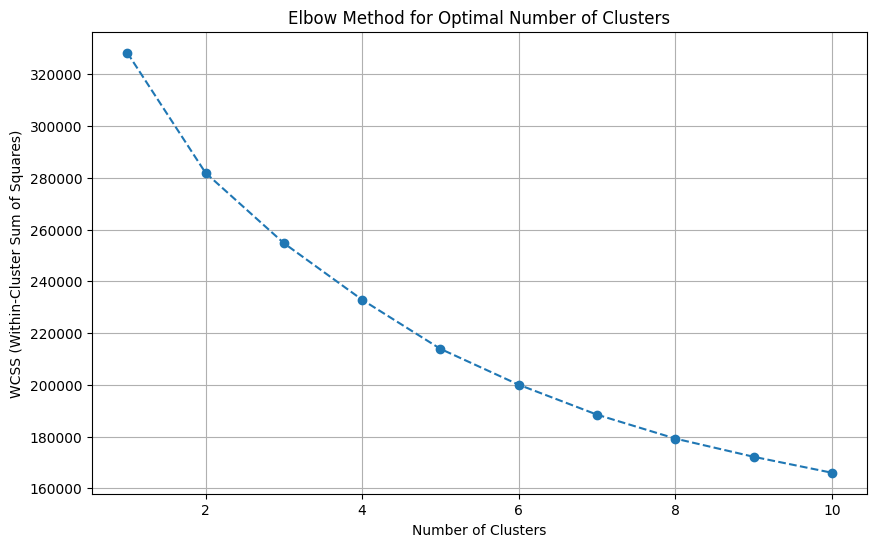

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                          track_name  playlist_genre  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...               2   
1                    Memories - Dillon Francis Remix               2   
2                    All the Time - Don Diablo Remix               2   
3                  Call You Mine - Keanu Silva Remix               2   
4            Someone You Loved - Future Humans Remix               2   

   danceability  energy  loudness  speechiness  acousticness  \
0         0.748   0.916    -2.634       0.0583        0.1020   
1         0.726   0.815    -4.969       0.0373        0.0724   
2         0.675   0.931    -3.432       0.0742        0.0794   
3         0.718   0.930    -3.778       0.1020        0.0287   
4         0.650   0.833    -4.672       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  Cluster  
0          0.000000    0.0653    0.518  122.036        1  
1          0.004210    0.3570    0.693   99.972        1  
2    

<ipython-input-6-10cb6610c20b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_relevant['Cluster'] = clusters


In [6]:
# Standard Scaler Implementation
def standard_scaler(X):
    # Calculate mean and standard deviation for each feature
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    # Standardize the features
    X_scaled = (X - means) / stds
    return X_scaled

# Apply standard scaler to the data
X_scaled = standard_scaler(X.values)

# Convert the standardized data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Perform K-means clustering with the optimal number of clusters
optimal_clusters = 4  # Example: choose 4 clusters based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled_df)

# Add the cluster labels to the original dataframe
spotify_data_relevant['Cluster'] = clusters

# Display the first few rows of the dataframe with cluster labels
print(spotify_data_relevant.head())

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

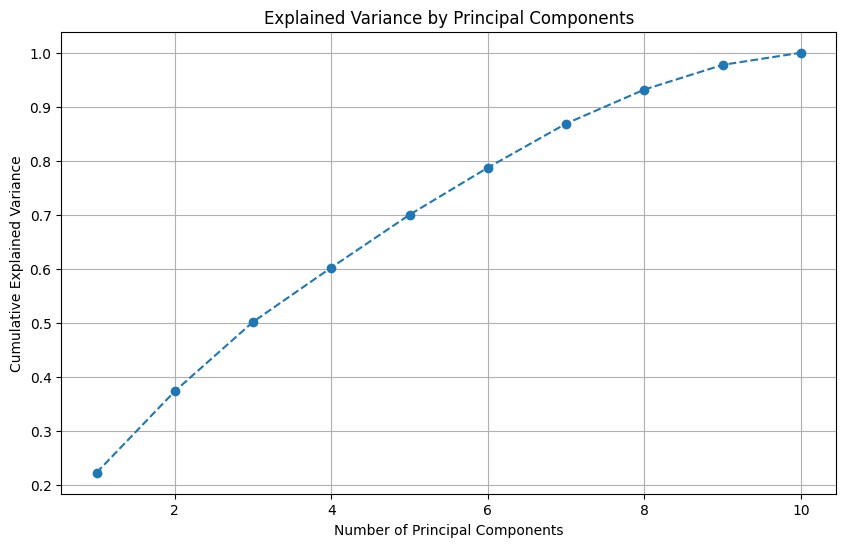

Number of components to retain (explaining 90.0% variance): 8
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.598404 -0.541447 -0.474424 -0.918701 -0.366653 -0.528385 -0.039858   
1 -1.107647 -0.689429 -0.171034 -0.306474  1.409499  0.523325  0.360565   
2 -1.637804 -0.448734 -0.095863 -0.796832 -0.264041 -0.172344  0.049608   
3 -1.633329  0.190982 -0.130374  0.001715  0.142147 -0.859274 -0.322569   
4 -1.105366 -0.493119 -0.160975 -1.196347 -0.333226  0.237129  0.247899   

        PC8  
0  0.312503  
1 -0.210833  
2  0.393314  
3 -0.250265  
4  0.206475  


In [7]:
# PCA for Dimensionality Reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled_df)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance to determine the number of principal components to retain
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Choose the number of components that explain a significant amount of variance (e.g., 90%)
variance_threshold = 0.90
n_components = np.argmax(np.cumsum(explained_variance) >= variance_threshold) + 1
print(f"Number of components to retain (explaining {variance_threshold*100}% variance): {n_components}")

# Perform PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled_df)

# Convert the reduced data back to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the first few rows of the PCA reduced data
print(X_pca_df.head())

# Clustering

Implement K-means for clustering from scratch.

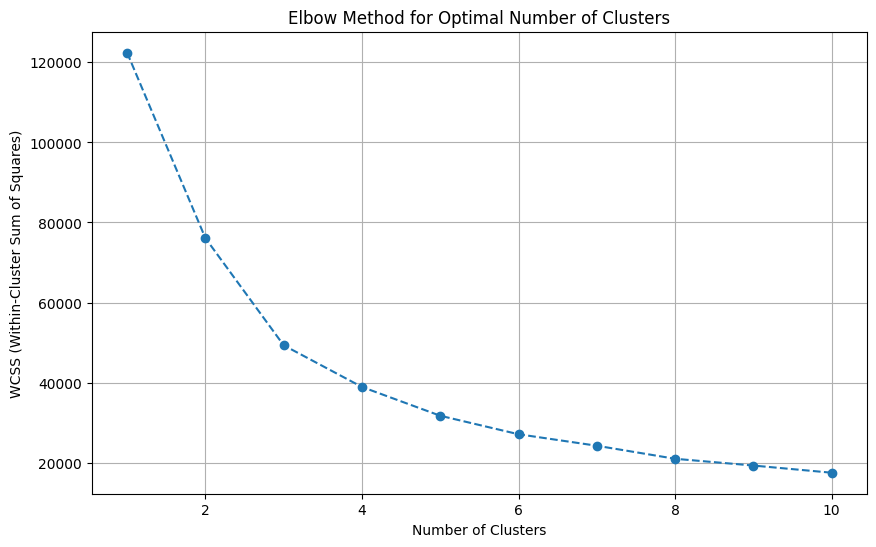

<ipython-input-9-a61dae3f693e>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_relevant['Cluster'] = clusters


                                          track_name  playlist_genre  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...               2   
1                    Memories - Dillon Francis Remix               2   
2                    All the Time - Don Diablo Remix               2   
3                  Call You Mine - Keanu Silva Remix               2   
4            Someone You Loved - Future Humans Remix               2   

   danceability  energy  loudness  speechiness  acousticness  \
0         0.748   0.916    -2.634       0.0583        0.1020   
1         0.726   0.815    -4.969       0.0373        0.0724   
2         0.675   0.931    -3.432       0.0742        0.0794   
3         0.718   0.930    -3.778       0.1020        0.0287   
4         0.650   0.833    -4.672       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  Cluster  Cluster_Scratch  
0          0.000000    0.0653    0.518  122.036        3                2  
1          0.004210    0.3570 

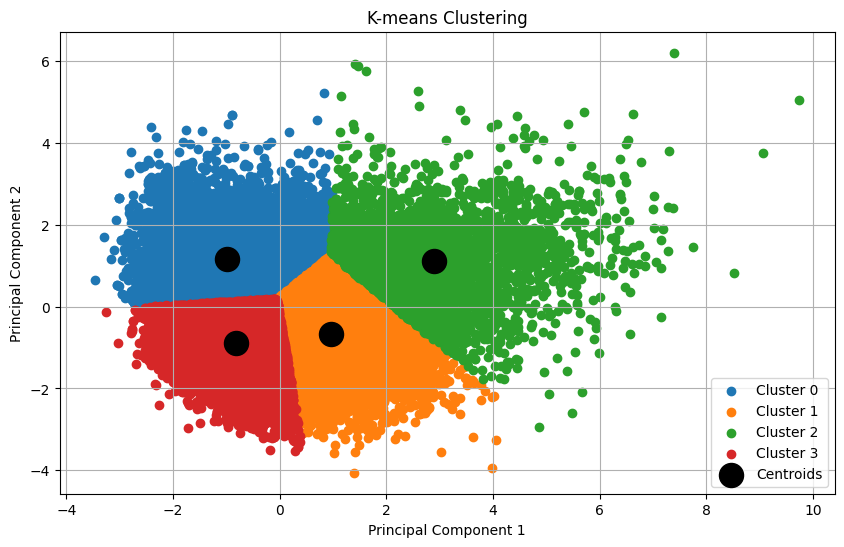

In [9]:
# Perform PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means clustering implementation from scratch
class KMeansScratch:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for i in range(self.max_iter):
            self.labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        return np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

    def predict(self, X):
        return self._assign_clusters(X)

# Determine the optimal number of clusters using the elbow method
def plot_elbow_method(X, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeansScratch(n_clusters=k)
        kmeans.fit(X)
        wcss.append(np.sum((X - kmeans.centroids[kmeans.predict(X)])**2))
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.grid(True)
    plt.show()

# Plot the elbow method graph
plot_elbow_method(X_pca)

# Perform K-means clustering with the optimal number of clusters
optimal_clusters = 4  # Example: choose 4 clusters based on the elbow method plot
kmeans_scratch = KMeansScratch(n_clusters=optimal_clusters)
kmeans_scratch.fit(X_pca)
clusters = kmeans_scratch.predict(X_pca)

# Add the cluster labels to the original dataframe
spotify_data_relevant['Cluster'] = clusters

# Display the first few rows of the dataframe with cluster labels
print(spotify_data_relevant.head())

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans_scratch.centroids[:, 0], kmeans_scratch.centroids[:, 1], s=300, c='black', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

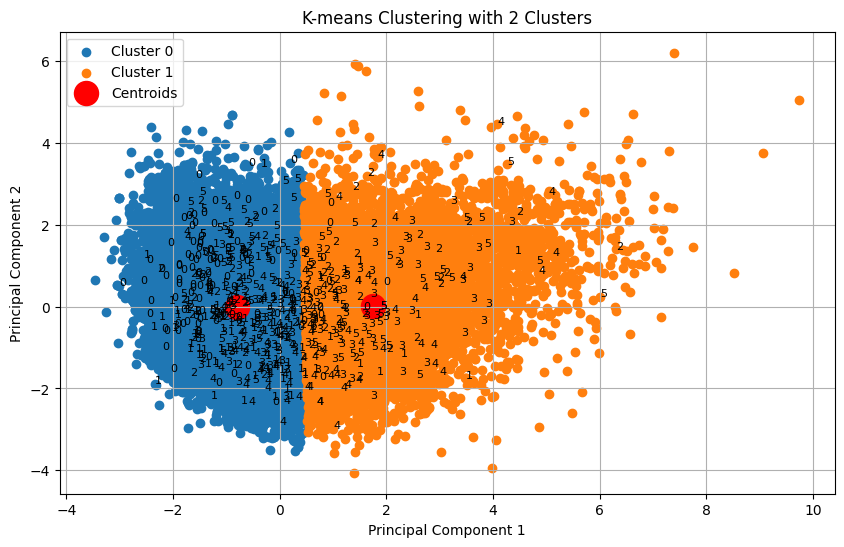

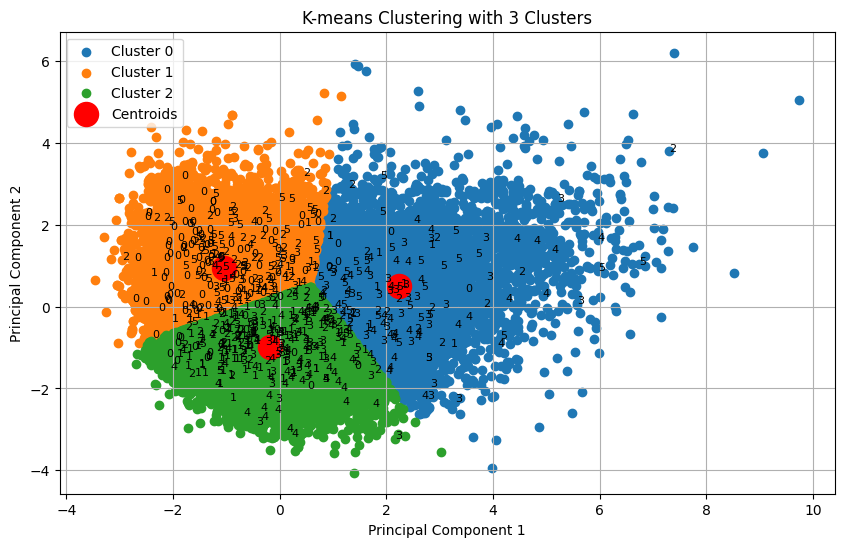

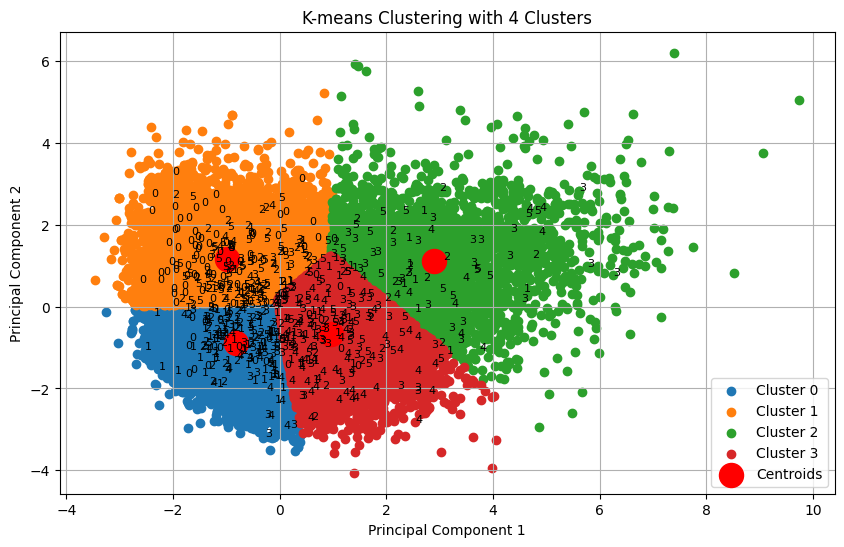

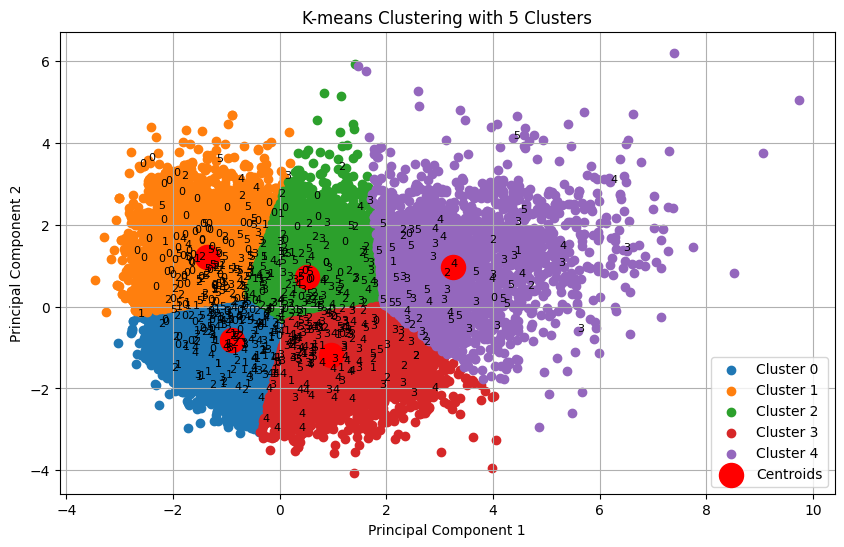

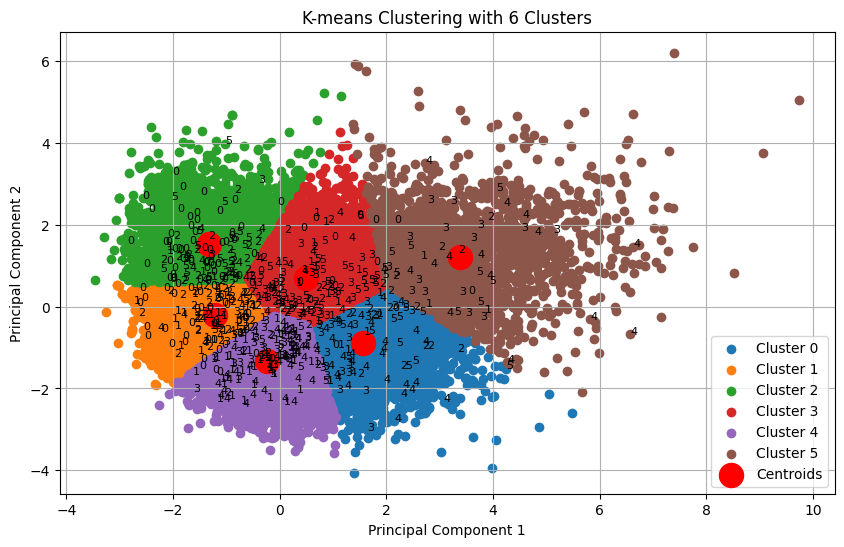

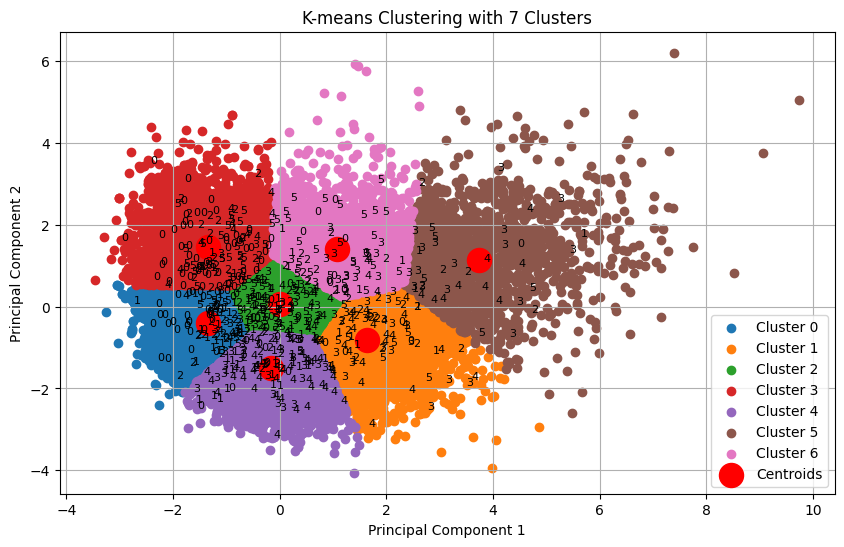

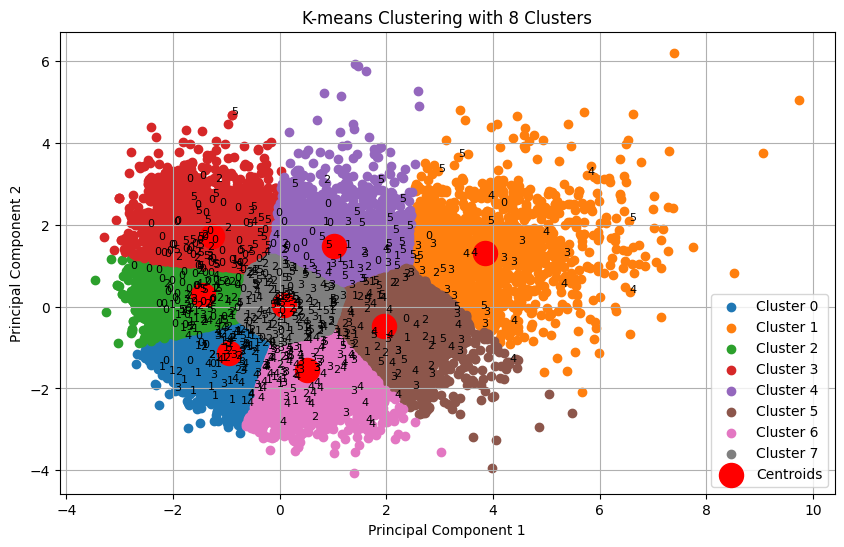

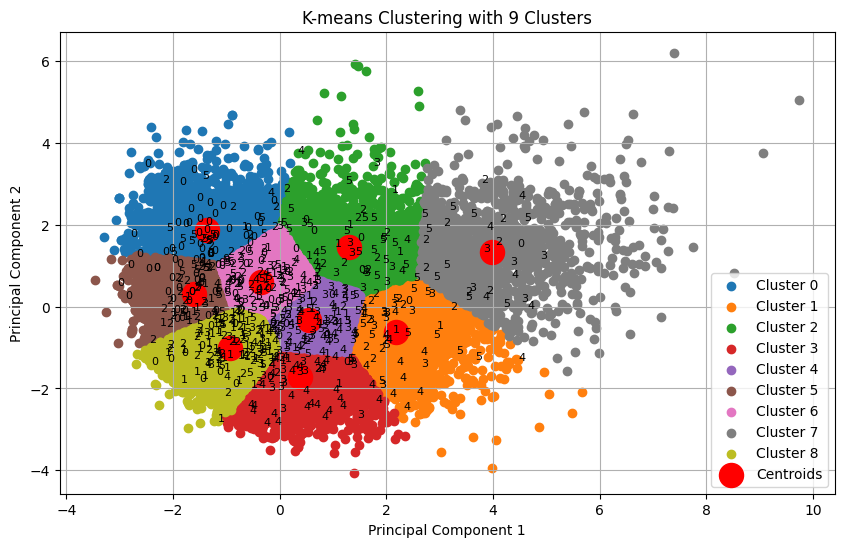

In [11]:
# Function to execute K-means and plot results
def execute_kmeans_and_plot(X, X_pca, genres, num_clusters):
    kmeans_scratch = KMeansScratch(n_clusters=num_clusters)
    kmeans_scratch.fit(X_pca)
    clusters = kmeans_scratch.predict(X_pca)

    # Add the cluster labels to the dataframe
    df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_plot['Cluster'] = clusters
    df_plot['Genre'] = genres

    # Plot the clusters with genres
    plt.figure(figsize=(10, 6))
    for cluster in range(num_clusters):
        cluster_data = df_plot[df_plot['Cluster'] == cluster]
        plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
        # Randomly sample 2% of the indices for annotation
        sample_indices = cluster_data.sample(frac=0.02, random_state=42).index
        for i in sample_indices:
            plt.text(cluster_data['PC1'][i], cluster_data['PC2'][i], cluster_data['Genre'][i], fontsize=8)

    plt.scatter(kmeans_scratch.centroids[:, 0], kmeans_scratch.centroids[:, 1], s=300, c='red', label='Centroids')
    plt.title(f'K-means Clustering with {num_clusters} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Execute K-means with cluster range 2 to 9 and plot results
genres = spotify_data_relevant['playlist_genre']
for num_clusters in range(2, 10):
    execute_kmeans_and_plot(X, X_pca, genres, num_clusters)

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

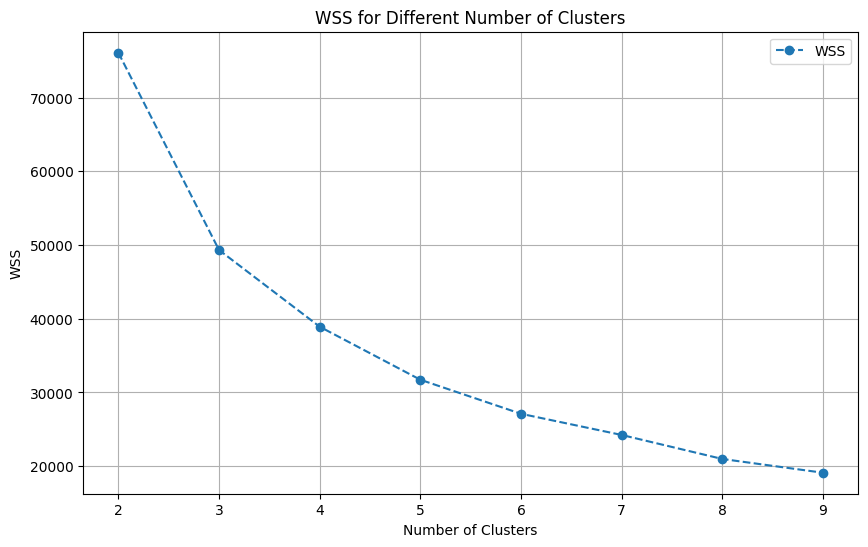

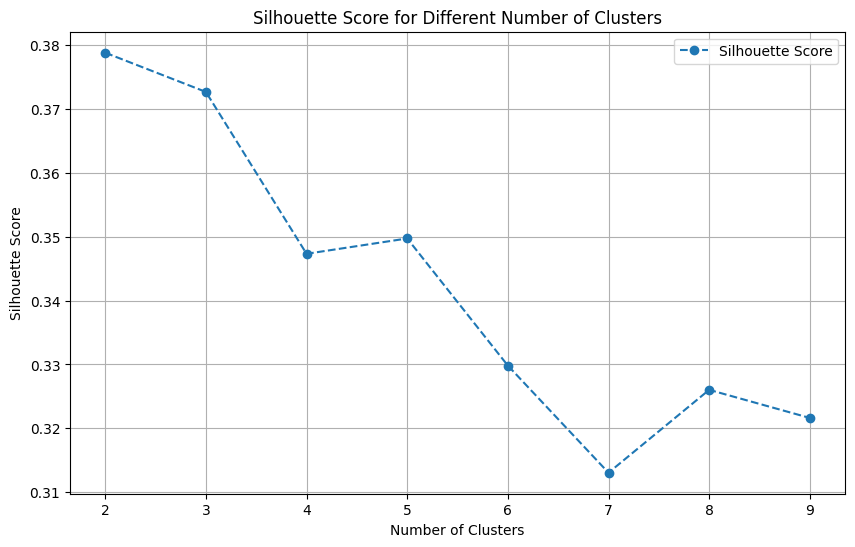

In [12]:
# Function to calculate WSS
def calculate_wss(X, labels, centroids):
    wss = 0
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        wss += np.sum((cluster_points - centroids[i]) ** 2)
    return wss

# Lists to store the scores
wss_scores = []
silhouette_scores = []

# Range of clusters
cluster_range = range(2, 10)

# Compute WSS and Silhouette scores for each number of clusters
for n_clusters in cluster_range:
    kmeans_scratch = KMeansScratch(n_clusters=n_clusters)
    kmeans_scratch.fit(X_pca)
    clusters = kmeans_scratch.predict(X_pca)

    # Calculate WSS
    wss = calculate_wss(X_pca, clusters, kmeans_scratch.centroids)
    wss_scores.append(wss)

    # Calculate Silhouette score
    silhouette_avg = silhouette_score(X_pca, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot WSS scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wss_scores, marker='o', linestyle='--', label='WSS')
plt.title('WSS for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.grid(True)
plt.legend()
plt.show()

# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()

Optimal number is 4 based on the figures.

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [13]:
# Function to execute K-means and get labels
def execute_kmeans(X, num_clusters):
    kmeans_scratch = KMeansScratch(n_clusters=num_clusters)
    kmeans_scratch.fit(X)
    return kmeans_scratch.predict(X), kmeans_scratch.centroids

# Determine the optimal number of clusters using the Silhouette score (as an example)
num_clusters = 4  # Assuming 4 based on previous analysis

# Execute K-means clustering
clusters, centroids = execute_kmeans(X_scaled, num_clusters)

# Add cluster labels to the original dataframe
spotify_data_relevant['Cluster'] = clusters

# Sample check: randomly select two songs from each cluster
def sample_check(df):
    sample_pairs = []
    for cluster in range(num_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        sample_pairs.append(cluster_data.sample(2, random_state=42)[['playlist_genre']])
    return sample_pairs

sample_pairs = sample_check(spotify_data_relevant)

# Print the sample pairs
for i, pair in enumerate(sample_pairs):
    print(f"Cluster {i}:")
    print(pair)
    print()

Cluster 0:
       playlist_genre
1716                2
23356               3

Cluster 1:
      playlist_genre
5191               2
9737               4

Cluster 2:
       playlist_genre
23500               3
24395               3

Cluster 3:
       playlist_genre
5489                2
30113               0



<ipython-input-13-eedc1522d461>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_relevant['Cluster'] = clusters


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

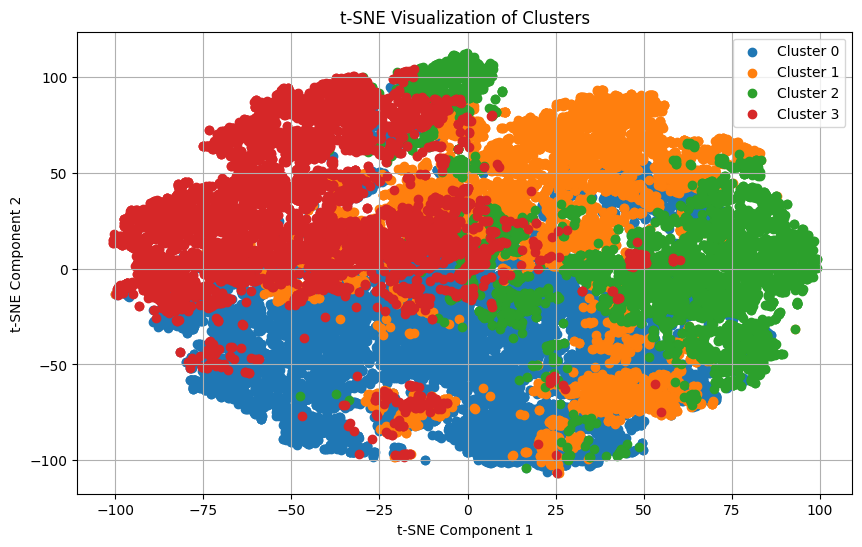

In [14]:
# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = X_tsne[spotify_data_relevant['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()